# Machine Learning Nanodegree Capstone Project

Urvi Patel Yi<br>
December 2018


# Import Data


In [31]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sn
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Loading data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
switzerlandData = pd.read_csv('switzerland.csv', names = features)

# Load the Cleveland heart disease datasets
try:
    clevelandData = pd.read_csv('cleveland.csv', names = features)
    print("Cleveland Heart Disease UCI {} samples with {} features each.".format(*clevelandData.shape))
except:
    print("Cleveland Dataset could not be loaded. Is the dataset missing?")
    
    
# Load the Hungarian heart disease datasets
try:
    hungarianData = pd.read_csv('hungary.csv', names = features)
    print("Hungarian Heart Disease UCI {} samples with {} features each.".format(*hungarianData.shape))
except:
    print("Hungarian Dataset could not be loaded. Is the dataset missing?")
    
# Load the Swiss heart disease datasets
try:
    swissData = pd.read_csv('switzerland.csv', names = features)
    print("Swiss Heart Disease UCI {} samples with {} features each.".format(*swissData.shape))
except:
    print("Swiss Dataset could not be loaded. Is the dataset missing?")


Cleveland Heart Disease UCI 303 samples with 14 features each.
Hungarian Heart Disease UCI 294 samples with 14 features each.
Swiss Heart Disease UCI 123 samples with 14 features each.


In [32]:
# Combine datasets into one large dataset

datatemp = [clevelandData, hungarianData, swissData]
data = pd.concat(datatemp)
print("Combined Heart Disease UCI {} samples with {} features each.".format(*data.shape))

data.head()


Combined Heart Disease UCI 720 samples with 14 features each.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Features
<ul>
    <li><b>age:</b> age in years</li>
    <li><b>sex:</b> sex (1 = male; 0 = female)</li>
    <li><b>cp:</b> chest pain type
    <ul>
    <li>1 = typical angina </li>
    <li>2 = atypical angina</li>
    <li>3 = non-anginal pain</li>
    <li>4 = asymptomatic</li>
    </ul>
    </li>
    <li><b>trestbps:</b> resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>chol:</b> serum cholesterol in mg/dl</li>
    <li><b>fbs:</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li><b>restecg:</b> resting electrocardiographic results
    <ul>
    <li>0 = normal </li>
    <li>1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) </li>
    <li>2 = showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
    </ul>
</li>
    <li><b>thalach:</b> maximum heart rate achieved</li>
    <li><b>exang:</b> exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeak:</b> ST depression induced by exercise relative to rest</li>
    <li><b>slope:</b> the slope of the peak exercise ST segment
    <ul>
        <li>1 = upsloping </li>
        <li>2 = flat </li>
        <li>3 = downsloping</li>
    </ul>
    </li>
    <li><b>ca:</b> number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
    <li><b>heart disease:</b> diagnosis of heart disease (angiographic disease status)
    <ul>
        <li>0 = less than 50% diameter narrowing </li>
        <li>1 = 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)</li>
        <li> 1 - 4 = presence of heart diease</li>
    </li>
</ul>

# Data Exploration

In [33]:
# Total number of records
total = data.shape[0]

# Count number of occurances of Heart Diease Values
data['heartdisease'].value_counts()

0    360
1    209
2     68
3     65
4     18
Name: heartdisease, dtype: int64

The Cleveland dataset, which composes half of this dataset, did not record values 2-4 to distinguish different types of heart disease.  Because of this, the heart disease target column is skewed toward values 0 and 1.  In the data preprossing section, I will convert values 2-4 to a value of 1, to indicate the precense of heart disease. 

In [34]:
# Are there columns with a lot of missing data?
# Display a description of the dataset to find out
data.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
count,720.000000,720.000000,720.000000,720,720.0,720,720,720,720,720.0,720,720,720,720.000000
unique,NaN,NaN,NaN,86,307.0,5,7,188,5,77.0,7,8,7,NaN
top,NaN,NaN,NaN,120,0.0,0,0,150,0,0.0,?,?,?,NaN
freq,NaN,NaN,NaN,78,123.0,309,320,32,272,288.0,207,413,320,NaN
mean,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850000
std,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.076878
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In this dataset, it looks like ? is used to indicate that the value is missing from the patient.  I will change all ? to null (NaN) in the preprocessing section.

The TOP value in the ca, slope, and thal columns is ?.  This indicates that these columns have a lot of missing data, so I will drop these columns in the preprocessing section.

Furthermore, it looks like pandas is treating a lot of of the columns as string values (most likely because of the "?").  I will convert these to numerical values in the data preprocessing section.

# Data Preprocessing

In [35]:
# Remove features from the larger dataset which contains a lot of missing data

data = data.drop(["ca", "slope", "thal"],axis=1)
data = data.replace('?', np.nan)
print("After removing features with lots of missing data: Combined Heart Disease UCI {} samples with {} features each.".format(*data.shape))

data.head()

After removing features with lots of missing data: Combined Heart Disease UCI 720 samples with 11 features each.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0


In [36]:
# Replace all nonzero values to 1 in heartdisease column

data['heartdisease'] = data['heartdisease'].replace(2, 1)
data['heartdisease'] = data['heartdisease'].replace(3, 1)
data['heartdisease'] = data['heartdisease'].replace(4, 1)

In [37]:
data['heartdisease'].value_counts()

1    360
0    360
Name: heartdisease, dtype: int64

In [38]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,1
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0


In [39]:
data.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
count,720.000000,720.000000,720.000000,717,697.0,637,718,718,718,714.0,720.000000
unique,NaN,NaN,NaN,85,306.0,4,6,187,4,76.0,NaN
top,NaN,NaN,NaN,120,0.0,0,0,150,0,0.0,NaN
freq,NaN,NaN,NaN,78,123.0,309,320,32,272,288.0,NaN
mean,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500348
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [40]:
# Convert String columns into numeric columns
#data['trestbps'] = data.to_numeric(data['trestbps'], errors='coerce')

data = data.apply(pd.to_numeric)

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


In [42]:
data.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
count,720.000000,720.000000,720.000000,717.000000,697.000000,637.000000,718.000000,718.000000,718.000000,714.000000,720.000000
mean,51.888889,0.738889,3.179167,131.804742,204.774749,0.109890,0.568245,140.565460,0.337047,0.789636,0.500000
std,9.193720,0.439546,0.953646,18.529331,109.275156,0.312999,0.833534,25.647172,0.473031,1.066961,0.500348
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,182.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,227.000000,0.000000,0.000000,142.000000,0.000000,0.200000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


# Data Visualization

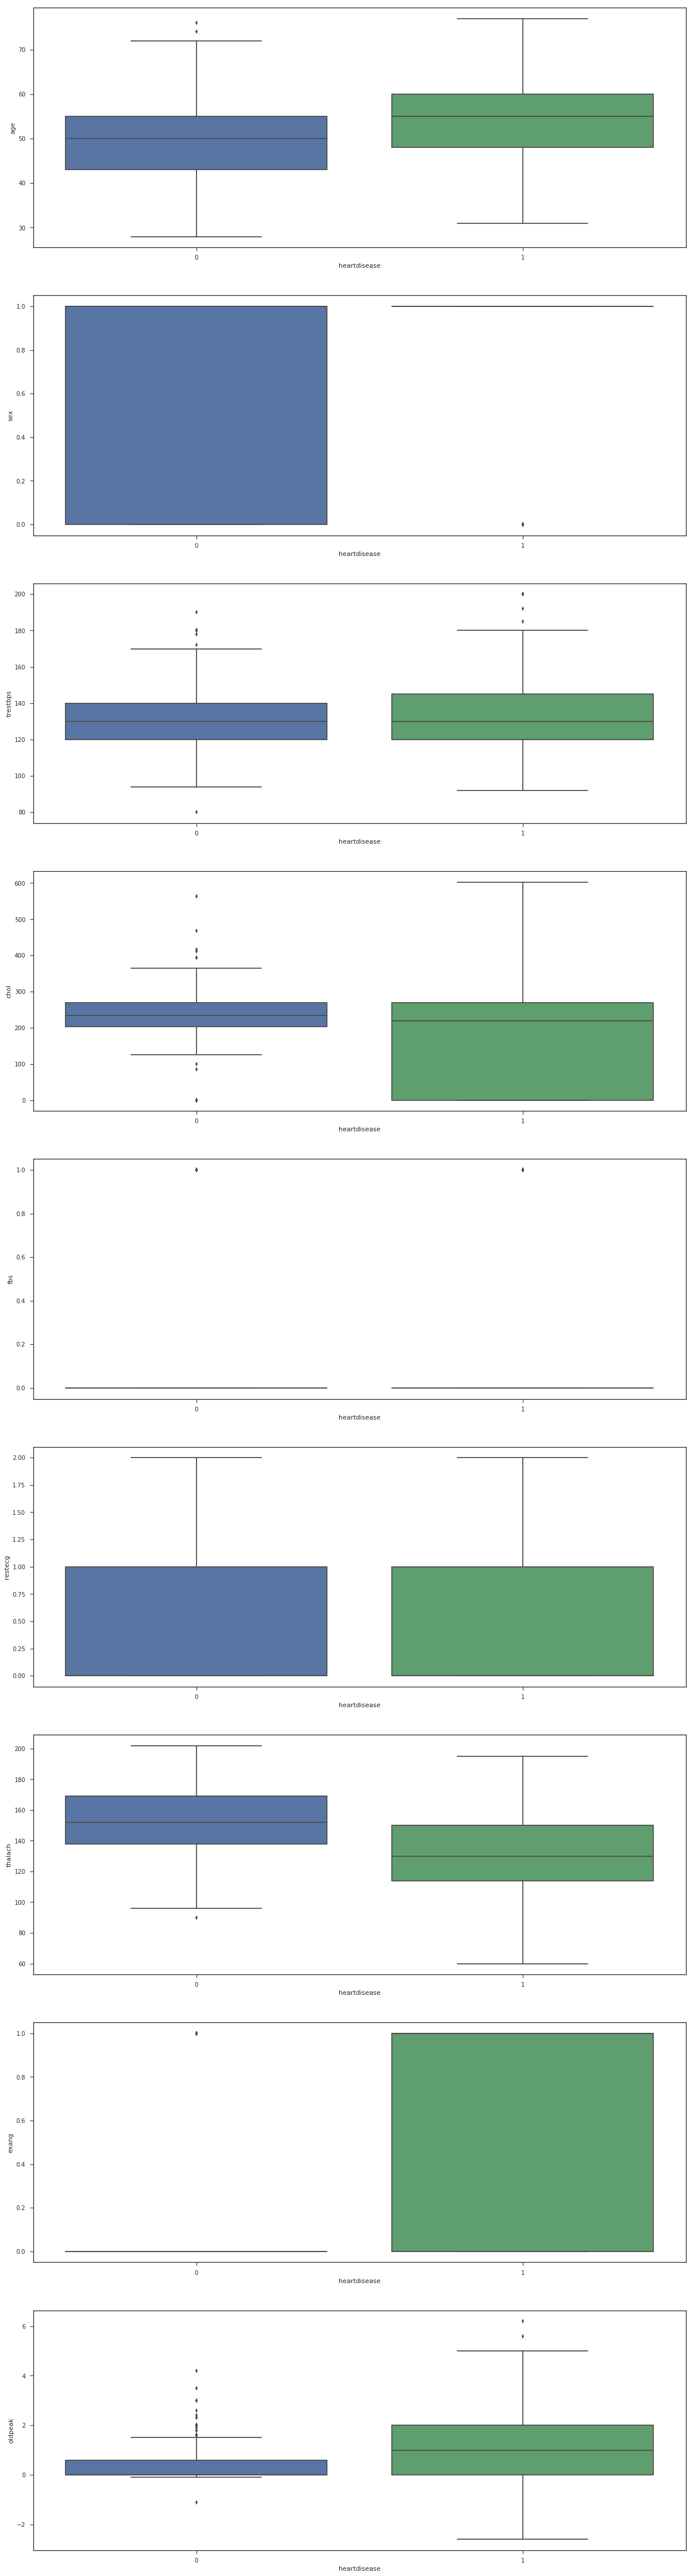

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

# Box plots of each feature compared against heart disease targets
fig, axes = plt.subplots(nrows=9,ncols=1)
fig.set_size_inches(20, 80)
sns.boxplot(data=data,y="age",x="heartdisease",orient="v",ax=axes[0])
sns.boxplot(data=data,y="sex",x="heartdisease",orient="v",ax=axes[1])
sns.boxplot(data=data,y="trestbps",x="heartdisease",orient="v",ax=axes[2])
sns.boxplot(data=data,y="chol",x="heartdisease",orient="v",ax=axes[3])
sns.boxplot(data=data,y="fbs",x="heartdisease",orient="v",ax=axes[4])
sns.boxplot(data=data,y="restecg",x="heartdisease",orient="v",ax=axes[5])
sns.boxplot(data=data,y="thalach",x="heartdisease",orient="v",ax=axes[6])
sns.boxplot(data=data,y="exang",x="heartdisease",orient="v",ax=axes[7])
sns.boxplot(data=data,y="oldpeak",x="heartdisease",orient="v",ax=axes[8])

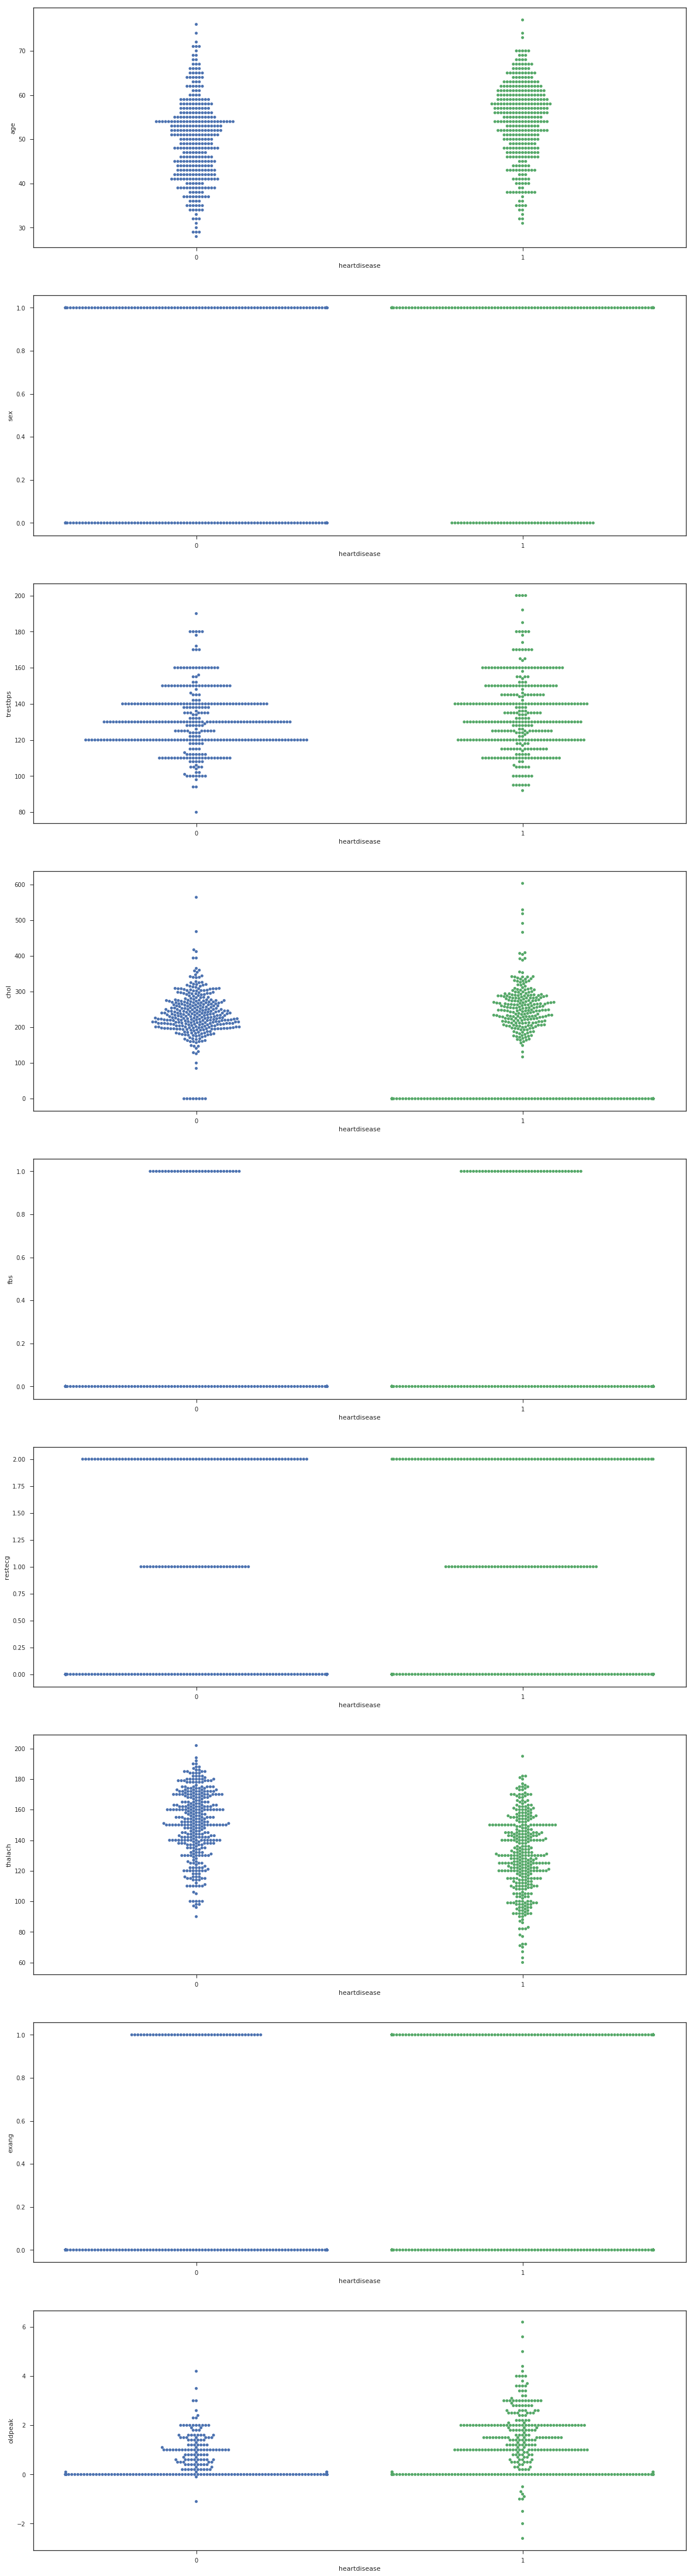

In [102]:
# Swarm plots of each feature compared against heart disease targets
fig, axes = plt.subplots(nrows=9,ncols=1)
fig.set_size_inches(20, 80)
sns.swarmplot(data=data,y="age",x="heartdisease",orient="v",ax=axes[0])
sns.swarmplot(data=data,y="sex",x="heartdisease",orient="v",ax=axes[1])
sns.swarmplot(data=data,y="trestbps",x="heartdisease",orient="v",ax=axes[2])
sns.swarmplot(data=data,y="chol",x="heartdisease",orient="v",ax=axes[3])
sns.swarmplot(data=data,y="fbs",x="heartdisease",orient="v",ax=axes[4])
sns.swarmplot(data=data,y="restecg",x="heartdisease",orient="v",ax=axes[5])
sns.swarmplot(data=data,y="thalach",x="heartdisease",orient="v",ax=axes[6])
sns.swarmplot(data=data,y="exang",x="heartdisease",orient="v",ax=axes[7])
sns.swarmplot(data=data,y="oldpeak",x="heartdisease",orient="v",ax=axes[8])

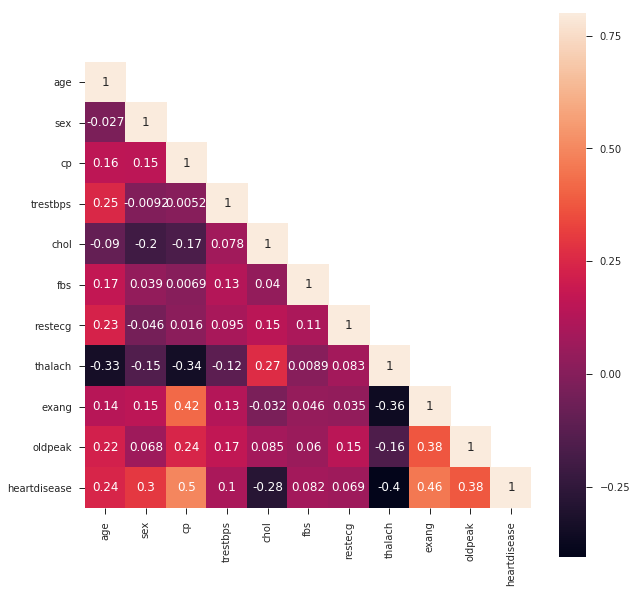

In [103]:
# Correlation analysis between features and target
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sn.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

# Naive Predictor

In [104]:
# This is a naive approach to the prediction model where I predicted that all patients have heart disease
# I used this to adjust the Beta value on the F-Beta evaluation metric

# Calculations for variables needed for precision, recall, and accuracy

true_pos = 360  # There are 360 patients in data set who have heart disease
false_pos = 360 # There are 360 patients in the data set who do not have heart disease

true_neg = 0 # No predicted negatives in the naive case
false_neg = 0 # No predicted negatives in the naive case

# Total number of records
total = data.shape[0]

# Calculate accuracy, precision and recall
accuracy = true_pos/total
recall = true_pos/(true_pos+false_neg)
precision = true_pos/(true_pos+false_pos)

# Calculate F-2 Score (Beta = 2)
beta = 2
fscore = (1+(beta**2))*((precision*recall)/(((beta**2)*precision)+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-2 Score: {:.4f}]".format(accuracy, fscore))

# Calculate FBeta Score (Beta = 1.5)
beta = 1.5
fscore = (1+(beta**2))*((precision*recall)/(((beta**2)*precision)+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-Beta (1.5): {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5000, F-2 Score: 0.8333]
Naive Predictor: [Accuracy score: 0.5000, F-Beta (1.5): 0.7647]


I got an FBeta (Beta = 1.5) score of 0.76 on the Naive Predictor that predicts that all patients have heart disease.  This is an acceptable score because half of the dataset actually has heart disease (50%), and I would like the model to be biased toward high recall.

# Benchmark Model

In [105]:
# This base model attempts to predict the heartdisease value
# This code is copied from https://github.com/PacktPublishing/Real-World-Machine-Learning-Projects-with-Scikit-Learn

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import normalize, Imputer, StandardScaler

# Preprocessing the data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputedData = imp.fit_transform(data)

# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=10)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the Model
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

# Accuracy of predictions
fbeta_score(y_test, preds, beta=1.5)


0.8172391445236552

The accuracy score using SVM is 0.82.  This is the score I will attempt to improve using a different machine learning algorithm.

# Deep Neural Network

In [94]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=10)


# create model
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
# Keras does not include an F2_score metric
# I used a script I found on Kaggle that can do this
# Credit:  Sergey Malyutin
# Source: https://www.kaggle.com/malyutins/keras-f2-score
# Note:  I modified Beta so it is now calculating using Beta = 1.5

from metrics import f_score

In [96]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f_score])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 33        
Total params: 4,577
Trainable params: 4,577
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Fit the model
model.fit(X_train, y_train, epochs=500, batch_size=10, verbose=1)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/500
504/504 [==============================] - 0s 182us/step - loss: 0.3997 - f_score: 0.7222
Epoch 2/500
504/504 [==============================] - 0s 170us/step - loss: 0.4011 - f_score: 0.7251
Epoch 3/500
504/504 [==============================] - 0s 166us/step - loss: 0.4091 - f_score: 0.7148
Epoch 4/500
504/504 [==============================] - 0s 168us/step - loss: 0.3923 - f_score: 0.7262
Epoch 5/500
504/504 [==============================] - 0s 167us/step - loss: 0.3953 - f_score: 0.7242
Epoch 6/500
504/504 [==============================] - 0s 165us/step - loss: 0.3919 - f_score: 0.7304
Epoch 7/500
504/504 [==============================] - 0s 169us/step - loss: 0.4060 - f_score: nan
Epoch 8/500
504/504 [==============================] - 0s 166us/step - loss: 0.3940 - f_score: nan
Epoch 9/500
504/504 [==============================] - 0s 168us/step - loss: 0.4134 - f_score: nan
Epoch 10/500
504/504 [==============================] - 0s 173us/step - loss: 0.4028 - f_sc

In [100]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

504/504 [==============================] - 0s 43us/step

 Training Accuracy: 0.837081714648
216/216 [==============================] - 0s 45us/step

 Testing Accuracy: 0.828787423908


# Reflection
Issues while training the neural network:

1.  First I tried training the neural network with 1000 epochs.  I discovered that this was too many because I got a training accuracy of 91%, but a testing accuracy of 82%.  This indicated that I was overfitting the data to the training set.
2.  Then I tried training the neural network with 50 epochs.  I discovered that this was too low because I got Training Accuracy of 75%, and a testing accuracy of 79%.  This indicates that I was underfitting the data.  

3.  I wanted to see if I could improve the results, so I increased the epochs by 50 epochs for a few runs and compared the training and testing accuracy scores.  I stopped at 500 epochs.  The training accuracy was 84%, and the testing accuracy was 83%.  If I tried increasing the epochs more than that, my testing accuracy began declining.  


Issues with Model Evaluation:

1.  I initially planned to use an Fbeta score to evaluate the model, using Beta = 2.  However, when I calculated the F2 score on the Naive Predictor, I got a score of 83%!  I thought this was too high of a score for a model that simply predicted that everyone has heart disease.  I wanted the score to be skewed toward high recall, so I lowered the Beta to 1.5.  


One of the most surprising aspects of this project:  It was very surprising to me to see just how much I could improve the accuracy of my results by only preprossing the data a little bit better.  For example, in the original version of this project, I decided to keep the heart disease values 0-4.  I was getting accuracy values close to 65% using an SVM model.  After noting the bias in the dataset, I converted the values in the heart disease column to binary 0 and 1.  After that, my accuracy jumped up to 81%.   